In [10]:
import igraph
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt


In [11]:
reduced_matrix_2009_2013_flows = pd.read_csv("../data/Table1_Reduced_matrix_2009_2013_flows.csv")


reduced_matrix_2009_2013_flows.head()

,Unnamed: 0,StartIndst,FinalIndst,Counts,SubActivity_StartIndst,SubActivity_FinalIndst,MainActivity_StartIndst,MainActivity_FinalIndst,MainIndustry_StartIndst,MainIndustry_FinalIndst,Initial_Counts
0,1,8520,8520,1.000000,Primary,Primary,Education,Education,"Government administrative functions, Education...","Government administrative functions, Education...",10210.0
1,2,8610,8520,-0.799701,Hospital activities,Primary,Human health activities,Education,"Government administrative functions, Education...","Government administrative functions, Education...",129.0
2,3,6419,8520,-0.809803,Other monetary intermediation,Primary,"Financial, insurance, pension",Education,Business services,"Government administrative functions, Education...",55.0
3,4,4711,8520,-0.420542,"Food, beverages, tobacco mainly",Primary,Non specialised retail stores,Education,"Wholesale and retail,motor vehicle repair,sale...","Government administrative functions, Education...",277.0
4,5,5310,8520,-0.879087,Under universal service obligation,Primary,"Postal, courier activities",Education,Transportation and Storage,"Government administrative functions, Education...",17.0


In [12]:
red_matrix_2009_2013_flows_not_inerflows = reduced_matrix_2009_2013_flows[reduced_matrix_2009_2013_flows['Counts']!=1]
red_matrix_2009_2013_flows_not_inerflows = red_matrix_2009_2013_flows_not_inerflows[red_matrix_2009_2013_flows_not_inerflows['Counts']>0]


red_matrix_2009_2013_flows_not_inerflows = red_matrix_2009_2013_flows_not_inerflows.sort_values(by=['Counts'],ascending=False)

red_matrix_2009_2013_flows_not_inerflows['weight'] = red_matrix_2009_2013_flows_not_inerflows['Counts']
red_matrix_2009_2013_flows_not_inerflows[1:100]



,Unnamed: 0,StartIndst,FinalIndst,Counts,SubActivity_StartIndst,SubActivity_FinalIndst,MainActivity_StartIndst,MainActivity_FinalIndst,MainIndustry_StartIndst,MainIndustry_FinalIndst,Initial_Counts,weight
1635,1636,1712,1813,0.999697,"Paper, paperboard","Pre-press, pre-media services",Paper and paper products,Printing,All other Manufacturing,All other Manufacturing,18.0,0.999697
1625,1626,1722,1729,0.999664,"Household, sanitary, toilet goods",Other,Paper and paper products,Paper and paper products,All other Manufacturing,All other Manufacturing,10.0,0.999664
1567,1568,2620,2899,0.999596,"Computers, peripheral equipment",Other,"Computer, electronic, optical",Special purpose machinery,"Manufacture computer, electronic, light electr...","Manufacture machinery, vehicle, transport",12.0,0.999596
1620,1621,2611,2612,0.999580,Electronic components,Loaded electronic boards,"Computer, electronic, optical","Computer, electronic, optical","Manufacture computer, electronic, light electr...","Manufacture computer, electronic, light electr...",15.0,0.999580
1548,1549,2012,2016,0.999580,Dyes and pigments,Plastics in primary forms,"Chemicals, chemical products","Chemicals, chemical products","Manufacture coke, petroleum, chemicals, pharma...","Manufacture coke, petroleum, chemicals, pharma...",14.0,0.999580
1618,1619,2814,2812,0.999563,"Other taps, valves",Fluid power equipment,General machinery,General machinery,"Manufacture machinery, vehicle, transport","Manufacture machinery, vehicle, transport",16.0,0.999563
1608,1609,2899,2620,0.999546,Other,"Computers, peripheral equipment",Special purpose machinery,"Computer, electronic, optical","Manufacture machinery, vehicle, transport","Manufacture computer, electronic, light electr...",15.0,0.999546
1539,1540,2362,812,0.999529,Plaster products for construction,"Gravel, sand pits; clays, kaolin","Concrete, cement and plaster","Mining, Quarrying and other",All other Manufacturing,"Mining, Quarrying (inc extraction of petroleum...",15.0,0.999529
1624,1625,1729,1722,0.999479,Other,"Household, sanitary, toilet goods",Paper and paper products,Paper and paper products,All other Manufacturing,All other Manufacturing,10.0,0.999479
1570,1571,812,2362,0.999462,"Gravel, sand pits; clays, kaolin",Plaster products for construction,"Mining, Quarrying and other","Concrete, cement and plaster","Mining, Quarrying (inc extraction of petroleum...",All other Manufacturing,19.0,0.999462


In [19]:
label_subactivity_df = red_matrix_2009_2013_flows_not_inerflows[['StartIndst','FinalIndst','SubActivity_StartIndst','MainActivity_StartIndst','MainIndustry_StartIndst','SubActivity_FinalIndst','MainActivity_FinalIndst','MainIndustry_FinalIndst']]

label_subactivity_df = label_subactivity_df.drop_duplicates()

In [20]:
tuples = [tuple(x) for x in red_matrix_2009_2013_flows_not_inerflows[['StartIndst','FinalIndst','weight']].values]
Gm = igraph.Graph.TupleList(tuples, directed = False,edge_attrs=['weight'])

print (np.mean(Gm.degree()))
Gm.edge_attributes()
Gm.vs['label'] = Gm.vs["name"]


6.230769230769231


In [21]:
names = Gm.vs['name']

subactivity = []
mainactivity = []
mainindustry = []

for i in names:
    try:
        subactivity.append(label_subactivity_df[label_subactivity_df['StartIndst'] == i]['SubActivity_StartIndst'].values[0])
    except:
        subactivity.append(label_subactivity_df[label_subactivity_df['FinalIndst'] == i]['SubActivity_FinalIndst'].values[0])

        
    try:
        mainactivity.append(label_subactivity_df[label_subactivity_df['StartIndst'] == i]['MainActivity_StartIndst'].values[0])
    except:
        mainactivity.append(label_subactivity_df[label_subactivity_df['FinalIndst'] == i]['MainActivity_FinalIndst'].values[0])
    
    try:
        mainindustry.append(label_subactivity_df[label_subactivity_df['StartIndst'] == i]['MainIndustry_StartIndst'].values[0])
    except:
        mainindustry.append(label_subactivity_df[label_subactivity_df['FinalIndst'] == i]['MainIndustry_FinalIndst'].values[0])


subactivity = ["missing" if (float(pd.isnull(x))) else x for x in subactivity]    
mainactivity = ["missing" if (float(pd.isnull(x))) else x for x in mainactivity]    
mainindustry = ["missing" if (float(pd.isnull(x))) else x for x in mainindustry]    

4.328671328671328


(array([156.,  23.,  24.,  17.,   8.,  11.,   6.,   7.,   9.,   5.,   1.,
          3.,   1.,   2.,   2.,   1.,   0.,   2.,   1.,   3.,   0.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([ 1.  ,  2.04,  3.08,  4.12,  5.16,  6.2 ,  7.24,  8.28,  9.32,
        10.36, 11.4 , 12.44, 13.48, 14.52, 15.56, 16.6 , 17.64, 18.68,
        19.72, 20.76, 21.8 , 22.84, 23.88, 24.92, 25.96, 27.  , 28.04,
        29.08, 30.12, 31.16, 32.2 , 33.24, 34.28, 35.32, 36.36, 37.4 ,
        38.44, 39.48, 40.52, 41.56, 42.6 , 43.64, 44.68, 45.72, 46.76,
        47.8 , 48.84, 49.88, 50.92, 51.96, 53.  ]),
 <a list of 50 Patch objects>)

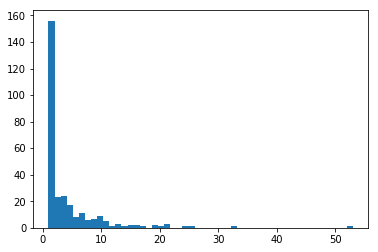

In [22]:
Gm_simple = Gm.simplify(combine_edges="mean")
Gm_simple.vs['label'] = Gm_simple.vs["name"]
print (np.mean(Gm_simple.degree()))
plt.hist(Gm_simple.degree(),bins=50)

In [23]:
names = Gm_simple.vs['name']
len(np.unique(names))

286

In [24]:
Gm_simple.vs['subactivity'] = subactivity
Gm_simple.vs['mainactivity'] = mainactivity
Gm_simple.vs['mainindustry'] = mainindustry

In [26]:
unique_industries = list(np.unique(mainindustry))

cmap = plt.get_cmap("jet")
colors = [cmap(i*15) for i in range(0,len(unique_industries))]
color_dict = dict(zip(unique_industries, colors))

Gm_simple.vs['color'] = [color_dict[industry] for industry in Gm_simple.vs['mainindustry']]
    

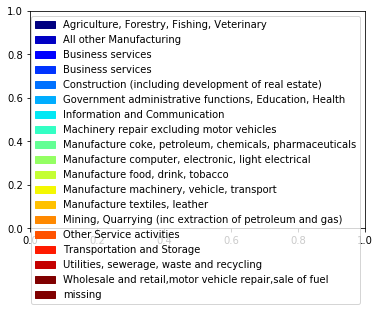

In [27]:
layout = Gm_simple.layout("fr")

test = [(2*l) for l in Gm_simple.es["weight"]]

a = igraph.plot(Gm_simple,"graph.png" ,vertex_label=Gm_simple.vs['subactivity'],edge_width=test,vertex_size=10,vertex_label_size=10,layout=layout,bbox=(2000,1200))

a.show()

red_patch = []
for i in range(0,len(unique_industries)):
    red_patch.append(mpatches.Patch(color=colors[i], label=unique_industries[i]))


plt.legend(handles=red_patch)

plt.show()

In [28]:
reduced_matrix = reduced_matrix_2009_2013_flows[['StartIndst','FinalIndst','SubActivity_StartIndst','SubActivity_StartIndst','Counts']]

reduced_matrix_sorted = reduced_matrix.sort_values(by=['StartIndst','FinalIndst'],ascending=True)

sorted_inds = np.unique(reduced_matrix_sorted['StartIndst'].values)

sorted_inds = sorted_inds[1:]

In [29]:


list_row  = []
for startInd in sorted_inds:
    
    start_df = reduced_matrix_sorted[reduced_matrix_sorted['StartIndst']==startInd]
    column_row = []
    for finalInd in sorted_inds:
        final_df = start_df[start_df['FinalIndst']==finalInd]
        if final_df.shape[0]==0:
            count = -1
        else:
            count = start_df[start_df['FinalIndst']==finalInd]['Counts'].values[0]
        
        column_row.append(count)
        
    list_row.append(column_row)

In [30]:
vegetables = sorted_inds
farmers = sorted_inds


fig, ax = plt.subplots(figsize=(180, 160))
im = ax.imshow(list_row)

# We want to show all ticks...
ax.set_xticks(np.arange(len(farmers)))
ax.set_yticks(np.arange(len(vegetables)))
# ... and label them with the respective list entries
ax.set_xticklabels(farmers)
ax.set_yticklabels(vegetables)


plt.xticks(fontsize=50, rotation=45)
plt.yticks(fontsize=50, rotation=45)

plt.show()